In [18]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
import pandas as pd
from spiro.models import *
import random
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import spiro.data_preprocessing

random.seed(0)
np.random.seed(0)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from tueplots import bundles
import numpy as np

In [20]:
data = pd.read_csv("../data/feature_30_joint_51.csv")
data= data[~data.iloc[:,0].isin([21,48])].reset_index(drop=True)
data.drop("Unnamed: 0",axis=1,inplace=True)

In [21]:
labels = pd.read_csv("../data/labels.csv")

In [22]:
final_data= pd.DataFrame(data)

In [23]:
demographic_data = pd.read_csv("../data/GroundTruth_Dataset.csv")

In [24]:
PID= ['P0', 'P2', 'P3', 'P5', 'P6', 'P9', 'P10', 'P12', 'P13', 'P14', 'P15', 'P17', 'P18', 'P19', 'P20', 'P21', 'P23', 'P26', 'P27', 'P28', 'P29', 'P31', 'P32', 'P33', 'P36','P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46','P50', 'P51', 'P52', 'P53', 'P55', 'P57', 'P58', 'P60', 'P61','P62', 'P63', 'P65', 'P66', 'P69', 'P70', 'P71','P73']

In [25]:
demographic_data= demographic_data[demographic_data.iloc[:,1].isin(PID)].reset_index(drop=True)
demographic_data.shape

(51, 17)

In [26]:
final_data['Sex'] = demographic_data['Sex'].map({'M': 0, 'F': 1})

In [27]:
final_data= pd.concat((final_data,pd.DataFrame(demographic_data.iloc[:,7:10])),axis=1,ignore_index=True)

In [28]:
X1 = final_data.iloc[:,:30].astype(float)
X1 = MinMaxScaler().fit_transform(np.array(X1))
X1 = pd.DataFrame(X1)
y = labels.iloc[:,-1].astype(float)


X2 = final_data.astype(float)
X2 = MinMaxScaler().fit_transform(np.array(X2))
X2 = pd.DataFrame(X2)

#For FEV1 
# y= labels.iloc[:,-2].astype(float)

In [29]:
X1.shape,X2.shape,y.shape

((51, 30), (51, 34), (51,))

# Without Demographics

#### FEV1

In [30]:
#For FEV1
y = labels.iloc[:,-2].astype(float)

committee_list = [
    GradientBoostingRegressor(loss="absolute_error", random_state=0),
    RandomForestRegressor(random_state=0),
    DecisionTreeRegressor(random_state=0)
]
models = [RandomForestRegressor(random_state=42), DecisionTreeRegressor(random_state=42), GradientBoostingRegressor(random_state=42), CommitteeRegressor(committee_list)]
model_names = ["Random Forest", "Decision Tree", "Gradient Boosting",  "Committee Regressor"]
mape_dict = {}
loo = LeaveOneOut()
tot = len(X1)

for j, model in enumerate(models):
    prog        = 0
    y_GT        = []
    y_PT        = []
    abserror    = []
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")
    print("{0} Regressor for FEV1 with {1} features (without demographics)".format(model_names[j],30))
    # For every split obtained by Leave_One_Out split function.
    for i,(train_index, test_index) in enumerate(loo.split(X1)):
        
        # To show some sort of progress.
        prog = prog + 1
        print("Progress : {0}/{1}".format(prog,tot),end = '\r')

        # Test-train split for the fold.
        X_Train, X_Test = X1.iloc[train_index],X1.iloc[test_index]
        y_Train, y_Test = y.iloc[train_index],y.iloc[test_index]
        
        # Training new Random Forest ensemble.
        model.fit(X_Train, y_Train)
        pred = model.predict(X_Test)  

        # print("Ground Truth : {0}".format(np.array(y_Test)[0]))
        # Storing the values of Ground truth and Predicted value for future use.
        # print(np.array(y_Test)[0])
        y_GT.append(np.array(y_Test)[0])
        y_PT.append(pred[0]) 


    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
    print("{0} metrics : ".format(model_names[j]))
    mape = 100 * mean_absolute_percentage_error(y_GT,y_PT)
    print("\tMean Absolute Percentage Error : " , mape)
    mape_dict[model_names[j]] = mape
    print("\tMean Aabsolute Error : " , mean_absolute_error(y_GT,y_PT))
    print("\tMean Square Error : " , mean_squared_error(y_GT,y_PT,squared=False))
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

print(mape_dict)

with open('../results/figure8/fev1/mape_wo_demographic.pkl', 'wb') as f:
    pickle.dump(mape_dict, f)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Random Forest Regressor for FEV1 with 30 features (without demographics)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Random Forest metrics : 
	Mean Absolute Percentage Error :  5.288223489526106
	Mean Aabsolute Error :  0.15850392156862736
	Mean Square Error :  0.2104297176694189
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Decision Tree Regressor for FEV1 with 30 features (without demographics)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Decision Tree metrics : 
	Mean Absolute Percentage Error :  6.412435252754866
	Mean Aabsolute Error :  0.1894117647058824
	Mean Square Error :  0.2509042470275675
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Gradient Boosting Regressor for FEV1 with 30 features (without demographics)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Gradient Boosting metri

#### FVC

In [31]:
#For FVC
y = labels.iloc[:,-1].astype(float)

committee_list = [
    GradientBoostingRegressor(loss="absolute_error", random_state=108),
    RandomForestRegressor(random_state=108),
    DecisionTreeRegressor(random_state=108)
]
models = [RandomForestRegressor(random_state=42), DecisionTreeRegressor(random_state=42), GradientBoostingRegressor(random_state=42), CommitteeRegressor(committee_list)]
model_names = ["Random Forest", "Decision Tree", "Gradient Boosting", "Committee Regressor"]
mape_dict = {}
loo = LeaveOneOut()
tot = len(X1)

for j, model in enumerate(models):
    prog        = 0
    y_GT        = []
    y_PT        = []
    abserror    = []
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")
    print("{0} Regressor for FVC with {1} features (without demographics)".format(model_names[j],30))
    # For every split obtained by Leave_One_Out split function.
    for i,(train_index, test_index) in enumerate(loo.split(X1)):
        
        # To show some sort of progress.
        prog = prog + 1
        print("Progress : {0}/{1}".format(prog,tot),end = '\r')

        # Test-train split for the fold.
        X_Train, X_Test = X1.iloc[train_index],X1.iloc[test_index]
        y_Train, y_Test = y.iloc[train_index],y.iloc[test_index]
        
        # Training new Random Forest ensemble.
        model.fit(X_Train, y_Train)
        pred = model.predict(X_Test)  

        # print("Ground Truth : {0}".format(np.array(y_Test)[0]))
        # Storing the values of Ground truth and Predicted value for future use.
        # print(np.array(y_Test)[0])
        y_GT.append(np.array(y_Test)[0])
        y_PT.append(pred[0]) 


    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
    print("{0} metrics : ".format(model_names[j]))
    mape = 100 * mean_absolute_percentage_error(y_GT,y_PT)
    print("\tMean Absolute Percentage Error : " , mape)
    mape_dict[model_names[j]] = mape
    print("\tMean Aabsolute Error : " , mean_absolute_error(y_GT,y_PT))
    print("\tMean Square Error : " , mean_squared_error(y_GT,y_PT,squared=False))
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

print(mape_dict)

with open('../results/figure8/fvc/mape_wo_demographic.pkl', 'wb') as f:
    pickle.dump(mape_dict, f)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Random Forest Regressor for FVC with 30 features (without demographics)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Random Forest metrics : 
	Mean Absolute Percentage Error :  4.580250399527127
	Mean Aabsolute Error :  0.15071764705882332
	Mean Square Error :  0.1915421215130638
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Decision Tree Regressor for FVC with 30 features (without demographics)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Decision Tree metrics : 
	Mean Absolute Percentage Error :  5.145846078816129
	Mean Aabsolute Error :  0.17215686274509806
	Mean Square Error :  0.2534468270025235
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Gradient Boosting Regressor for FVC with 30 features (without demographics)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Gradient Boosting metrics

# With Demographics

In [32]:
#For FEV1
y = labels.iloc[:,-2].astype(float)

committee_list = [
    GradientBoostingRegressor(loss="absolute_error", random_state=0),
    RandomForestRegressor(random_state=0),
    DecisionTreeRegressor(random_state=0)
]
models = [RandomForestRegressor(random_state=42), DecisionTreeRegressor(random_state=0), GradientBoostingRegressor(random_state=42), CommitteeRegressor(committee_list)]
model_names = ["Random Forest", "Decision Tree", "Gradient Boosting",  "Committee Regressor"]
mape_dict = {}
loo = LeaveOneOut()
tot = len(X2)

for j, model in enumerate(models):
    prog        = 0
    y_GT        = []
    y_PT        = []
    abserror    = []
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")
    print("{0} Regressor for FEV1 with {1} features (demographics)".format(model_names[j],30))
    # For every split obtained by Leave_One_Out split function.
    for i,(train_index, test_index) in enumerate(loo.split(X2)):
        
        # To show some sort of progress.
        prog = prog + 1
        print("Progress : {0}/{1}".format(prog,tot),end = '\r')

        # Test-train split for the fold.
        X_Train, X_Test = X2.iloc[train_index],X2.iloc[test_index]
        y_Train, y_Test = y.iloc[train_index],y.iloc[test_index]
        
        # Training new Random Forest ensemble.
        model.fit(X_Train, y_Train)
        pred = model.predict(X_Test)  

        # print("Ground Truth : {0}".format(np.array(y_Test)[0]))
        # Storing the values of Ground truth and Predicted value for future use.
        # print(np.array(y_Test)[0])
        y_GT.append(np.array(y_Test)[0])
        y_PT.append(pred[0]) 


    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
    print("{0} metrics : ".format(model_names[j]))
    mape = 100 * mean_absolute_percentage_error(y_GT,y_PT)
    print("\tMean Absolute Percentage Error : " , mape)
    mape_dict[model_names[j]] = mape
    print("\tMean Aabsolute Error : " , mean_absolute_error(y_GT,y_PT))
    print("\tMean Square Error : " , mean_squared_error(y_GT,y_PT,squared=False))
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

print(mape_dict)

with open('../results/figure8/fev1/mape_w_demographic.pkl', 'wb') as f:
    pickle.dump(mape_dict, f)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Random Forest Regressor for FEV1 with 30 features (demographics)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Random Forest metrics : 
	Mean Absolute Percentage Error :  4.309750530203754
	Mean Aabsolute Error :  0.12720196078431412
	Mean Square Error :  0.1720653973941077
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Decision Tree Regressor for FEV1 with 30 features (demographics)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Decision Tree metrics : 
	Mean Absolute Percentage Error :  6.178406613154305
	Mean Aabsolute Error :  0.18098039215686276
	Mean Square Error :  0.24905704520190927
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Gradient Boosting Regressor for FEV1 with 30 features (demographics)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Gradient Boosting metrics : 
	Mean Absolute P

In [33]:
#For FVC
y = labels.iloc[:,-1].astype(float)

committee_list = [
    GradientBoostingRegressor(loss="absolute_error", random_state=108),
    RandomForestRegressor(random_state=108),
    DecisionTreeRegressor(random_state=108)
]
models = [RandomForestRegressor(random_state=42), DecisionTreeRegressor(random_state=0), GradientBoostingRegressor(random_state=42), CommitteeRegressor(committee_list)]
model_names = ["Random Forest", "Decision Tree", "Gradient Boosting", "Committee Regressor"]
mape_dict = {}
loo = LeaveOneOut()
tot = len(X2)

for j, model in enumerate(models):
    prog        = 0
    y_GT        = []
    y_PT        = []
    abserror    = []
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")
    print("{0} Regressor for FVC with {1} features (demographics)".format(model_names[j],30))
    # For every split obtained by Leave_One_Out split function.
    for i,(train_index, test_index) in enumerate(loo.split(X2)):
        
        # To show some sort of progress.
        prog = prog + 1
        print("Progress : {0}/{1}".format(prog,tot),end = '\r')

        # Test-train split for the fold.
        X_Train, X_Test = X2.iloc[train_index],X2.iloc[test_index]
        y_Train, y_Test = y.iloc[train_index],y.iloc[test_index]
        
        # Training new Random Forest ensemble.
        model.fit(X_Train, y_Train)
        pred = model.predict(X_Test)  

        # print("Ground Truth : {0}".format(np.array(y_Test)[0]))
        # Storing the values of Ground truth and Predicted value for future use.
        # print(np.array(y_Test)[0])
        y_GT.append(np.array(y_Test)[0])
        y_PT.append(pred[0]) 


    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
    print("{0} metrics : ".format(model_names[j]))
    mape = 100 * mean_absolute_percentage_error(y_GT,y_PT)
    print("\tMean Absolute Percentage Error : " , mape)
    mape_dict[model_names[j]] = mape
    print("\tMean Aabsolute Error : " , mean_absolute_error(y_GT,y_PT))
    print("\tMean Square Error : " , mean_squared_error(y_GT,y_PT,squared=False))
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

print(mape_dict)

with open('../results/figure8/fvc/mape_w_demographic.pkl', 'wb') as f:
    pickle.dump(mape_dict, f)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Random Forest Regressor for FVC with 30 features (demographics)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Random Forest metrics : 
	Mean Absolute Percentage Error :  4.029816167406599
	Mean Aabsolute Error :  0.132513725490196
	Mean Square Error :  0.17307048433808553
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Decision Tree Regressor for FVC with 30 features (demographics)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Decision Tree metrics : 
	Mean Absolute Percentage Error :  4.445504764749398
	Mean Aabsolute Error :  0.14568627450980393
	Mean Square Error :  0.21754873242653508
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Gradient Boosting Regressor for FVC with 30 features (demographics)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Gradient Boosting metrics : 
	Mean Absolute Perce

In [34]:
# load data
with open('../results/figure8/fev1/mape_wo_demographic.pkl', 'rb') as f:
    mape_wo_demographic_fev1 = pickle.load(f)

with open('../results/figure8/fvc/mape_wo_demographic.pkl', 'rb') as f:
    mape_wo_demographic_fvc = pickle.load(f)

with open('../results/figure8/fev1/mape_w_demographic.pkl', 'rb') as f:
    mape_w_demographic_fev1 = pickle.load(f)

with open('../results/figure8/fvc/mape_w_demographic.pkl', 'rb') as f:
    mape_w_demographic_fvc = pickle.load(f)

In [35]:
fvc_demo = [round(value, 2) for value in mape_w_demographic_fvc.values()]
fev1_demo = [round(value, 2) for value in mape_w_demographic_fev1.values()]

fvc_wo_demo = [round(value, 2) for value in mape_wo_demographic_fvc.values()]
fev1_wo_demo = [round(value, 2) for value in mape_wo_demographic_fev1.values()]

In [36]:
fvc_list = list(zip(fvc_wo_demo, fvc_demo))
fev1_list = list(zip(fev1_wo_demo, fev1_demo))

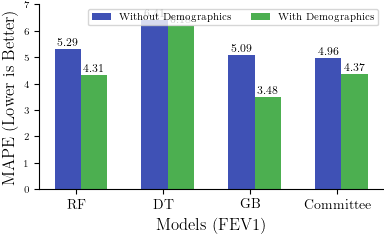

In [41]:
#With Demographics
plt.rcParams.update(bundles.tmlr2023(rel_width=0.6))

legend_labels = ['Without Demographics','With Demographics']
colors = ["#3f51b5","#4caf50"]

plt.rcParams['axes.labelsize']=12
# plt.rcParams['legend.fontsize']=9
plt.rcParams['xtick.labelsize']=10
fig = plt.figure()
ax = fig.gca()
# Define the data
labels = ['RF','DT','GB', 'RegressorCommittee']
# data = [[4.58,4.03],[5.15,4.44],[4.29,3.71],[4.45,3.84]]
data = fev1_list
bar_width = 0.3
x = np.arange(len(labels))

for m,i in enumerate(zip(legend_labels,colors)):
    rects = ax.bar(x + m*bar_width, [d[m] for d in data], bar_width, label=i[0],color=i[1])

for bar in ax.patches:
    cy = bar.get_y() + bar.get_height() + 0.25
    cx = bar.get_x() + bar.get_width() / 2
    ax.text(
        cx,
        cy,
        f"{bar.get_height():.2f}",
        rotation=0,
        color="black",
        fontsize=8,
        ha="center",
        va="center",
        zorder=2,
        weight="bold",
    )
# Add labels and title

x = np.arange(4)
plt.xlabel('Models (FEV1)')
# plt.axhline(y=7, color='r', linestyle='--',label='7% ATS Line')
plt.ylabel('MAPE (Lower is Better)')
plt.xticks(x+0.1, ['RF','DT','GB', 'Committee'])
plt.legend(ncol=2)

plt.ylim(0,7)
# savefig("loocv_results.pdf")
sns.despine()

plt.savefig('../figures/loocv_with_demo_fev1.pdf', format='pdf')

plt.show()

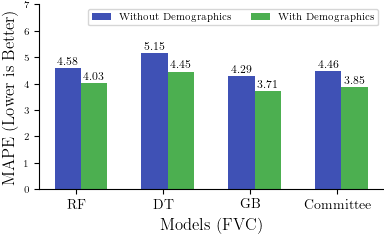

In [42]:
#With Demographics
plt.rcParams.update(bundles.tmlr2023(rel_width=0.6))

legend_labels = ['Without Demographics','With Demographics']
colors = ["#3f51b5","#4caf50"]

plt.rcParams['axes.labelsize']=12
# plt.rcParams['legend.fontsize']=9
plt.rcParams['xtick.labelsize']=10
fig = plt.figure()
ax = fig.gca()
# Define the data
labels = ['RF','DT','GB', 'RegressorCommittee']
# data = [[4.58,4.03],[5.15,4.44],[4.29,3.71],[4.45,3.84]]
data = fvc_list
bar_width = 0.3
x = np.arange(len(labels))

for m,i in enumerate(zip(legend_labels,colors)):
    rects = ax.bar(x + m*bar_width, [d[m] for d in data], bar_width, label=i[0],color=i[1])

for bar in ax.patches:
    cy = bar.get_y() + bar.get_height() + 0.25
    cx = bar.get_x() + bar.get_width() / 2
    ax.text(
        cx,
        cy,
        f"{bar.get_height():.2f}",
        rotation=0,
        color="black",
        fontsize=8,
        ha="center",
        va="center",
        zorder=2,
        weight="bold",
    )
# Add labels and title

x = np.arange(4)
plt.xlabel('Models (FVC)')
# plt.axhline(y=7, color='r', linestyle='--',label='7% ATS Line')
plt.ylabel('MAPE (Lower is Better)')
plt.xticks(x+0.1, ['RF','DT','GB', 'Committee'])
plt.legend(ncol=2)

plt.ylim(0,7)
# savefig("loocv_results.pdf")
sns.despine()

plt.savefig('../figures/loocv_with_demo_fvc.pdf', format='pdf')

plt.show()